In [ ]:
!pip install dmba

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# **Data Description**

In [ ]:
burn_df = pd.read_csv("https://raw.githubusercontent.com/Gruenther/MIS-536-Project/main/train.csv")
burn_df.columns = [s.strip().replace(' ','_') for s in burn_df.columns]

tmp2_df = burn_df.copy()
missing_rows = tmp2_df.sample(10).index
tmp2_df.loc[missing_rows] = np.nan
print('Number of rows with valid values after setting to NAN:\n', tmp2_df.count())
print('Number of rows with invalid values after setting to NAN:\n', len(tmp2_df) - burn_df.count())

Number of rows with valid values after setting to NAN:
 Employee_ID             22740
Date_of_Joining         22740
Gender                  22740
Company_Type            22740
WFH_Setup_Available     22740
Designation             22740
Resource_Allocation     21361
Mental_Fatigue_Score    20623
Burn_Rate               21617
dtype: int64
Number of rows with invalid values after setting to NAN:
 Employee_ID                0
Date_of_Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64


In [ ]:
burn_df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
burn_df.dropna(subset=['Resource_Allocation','Mental_Fatigue_Score','Burn_Rate'], inplace=True)
burn_df.isnull().sum()

Employee_ID             0
Date_of_Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
Burn_Rate               0
dtype: int64

In [ ]:
burn_df.drop(['Employee_ID', 'Date_of_Joining'], axis=1, inplace=True) 
print(burn_df.columns)

Index(['Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation',
       'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate'],
      dtype='object')


In [ ]:
print(burn_df.describe())

        Designation  Resource_Allocation  Mental_Fatigue_Score     Burn_Rate
count  18590.000000         18590.000000          18590.000000  18590.000000
mean       2.179398             4.486552              5.732173      0.452444
std        1.133148             2.044848              1.920547      0.197848
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.320000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000


In [ ]:
burn_df['Burn_Rate'] = [1 if x>= 0.60 else 0 for x in burn_df['Burn_Rate']]

In [ ]:
burn_df['Burn_Rate'].describe()

count    18590.000000
mean         0.238354
std          0.426088
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Burn_Rate, dtype: float64

In [ ]:
burn_df

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,Female,Service,No,2.0,3.0,3.8,0
1,Male,Service,Yes,1.0,2.0,5.0,0
3,Male,Service,Yes,1.0,1.0,2.6,0
4,Female,Service,No,3.0,7.0,6.9,0
5,Male,Product,Yes,2.0,4.0,3.6,0
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1.0,3.0,6.0,0
22744,Male,Product,No,3.0,7.0,6.2,0
22746,Female,Product,Yes,3.0,6.0,6.7,0
22748,Female,Service,No,2.0,5.0,5.9,0


In [ ]:
burn_df['Burn_Rate'].describe()

count    18590.000000
mean         0.238354
std          0.426088
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Burn_Rate, dtype: float64

# Modeling

In [ ]:
print(burn_df["Gender"].value_counts(), end="\n\n")
print(burn_df["Company_Type"].value_counts(), end="\n\n")
print(burn_df["WFH_Setup_Available"].value_counts(), end="\n\n")

Female    9747
Male      8843
Name: Gender, dtype: int64

Service    12174
Product     6416
Name: Company_Type, dtype: int64

Yes    10030
No      8560
Name: WFH_Setup_Available, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(burn_df.Gender)
burn_df['Gender'] = 1- encoder.transform(burn_df['Gender'])

encoder.fit(burn_df.Company_Type)
burn_df['Company_Type'] = 1- encoder.transform(burn_df['Company_Type'])

encoder.fit(burn_df.WFH_Setup_Available)
burn_df['WFH_Setup_Available'] = 1- encoder.transform(burn_df['WFH_Setup_Available'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pylab as plt


from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

import xgboost

In [ ]:
target = 'Burn_Rate'
predictors = list(burn_df.columns)
predictors.remove(target)
X = burn_df[predictors]
y = burn_df[target]

print(X)
print(y)

       Gender  Company_Type  ...  Resource_Allocation  Mental_Fatigue_Score
0           1             0  ...                  3.0                   3.8
1           0             0  ...                  2.0                   5.0
3           0             0  ...                  1.0                   2.6
4           1             0  ...                  7.0                   6.9
5           0             1  ...                  4.0                   3.6
...       ...           ...  ...                  ...                   ...
22743       1             1  ...                  3.0                   6.0
22744       0             1  ...                  7.0                   6.2
22746       1             1  ...                  6.0                   6.7
22748       1             0  ...                  5.0                   5.9
22749       0             1  ...                  6.0                   7.8

[18590 rows x 6 columns]
0        0
1        0
3        0
4        0
5        0
       

# Heat Map


In [ ]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

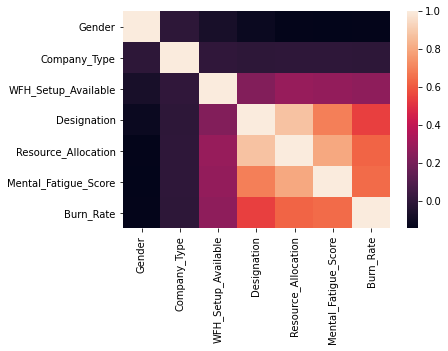

In [ ]:
corr = burn_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

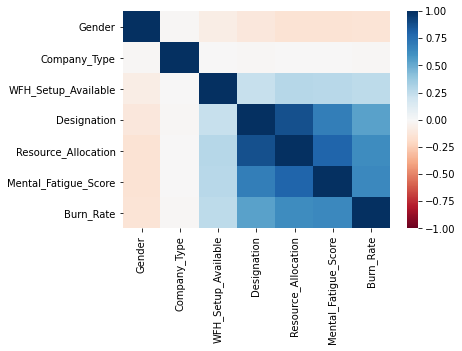

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

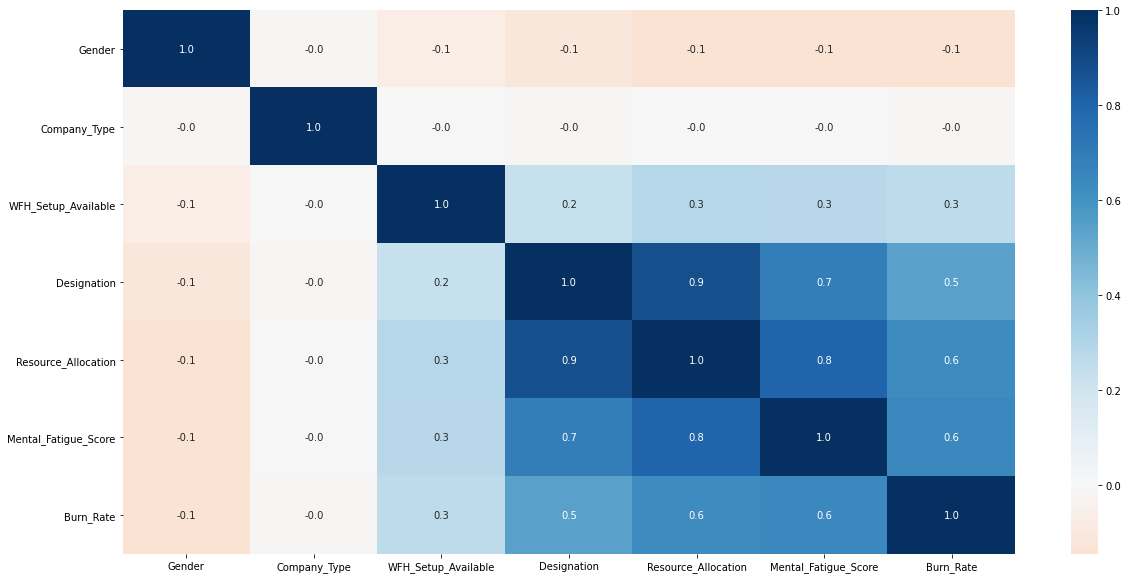

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [ ]:
train_X = X
train_y = y

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1)
print(train_X)
print(valid_X)

       Gender  Company_Type  ...  Resource_Allocation  Mental_Fatigue_Score
8977        0             0  ...                  5.0                   5.6
14115       1             0  ...                  5.0                   3.9
8797        1             0  ...                  5.0                   7.6
1173        1             1  ...                  2.0                   4.6
1941        0             1  ...                  6.0                   8.0
...       ...           ...  ...                  ...                   ...
13453       1             1  ...                  7.0                   8.9
21179       0             0  ...                  5.0                   3.7
6327        0             0  ...                  5.0                   5.9
14933       0             0  ...                  5.0                   7.1
288         1             1  ...                  5.0                   7.8

[13013 rows x 6 columns]
       Gender  Company_Type  ...  Resource_Allocation  Mental_

In [ ]:
train_X=pd.DataFrame(train_X)
valid_X=pd.DataFrame(valid_X)

# Knn

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
target = 'Burn_Rate'
predictors = list(burn_df.columns)
predictors.remove(target)
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1)
print("train_X", train_X.shape)
print("train_Y", train_y.shape)
print("valid_X", valid_X.shape)
print("valid_y", valid_y.shape)

train_X (13013, 6)
train_Y (13013,)
valid_X (5577, 6)
valid_y (5577,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)
knn_prediction_output = knn.predict(valid_X)
confusion = confusion_matrix(valid_y, knn_prediction_output)
confusion

array([[3974,  276],
       [ 294, 1033]])

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_X, train_y)
print("**** 1-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn1.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn1.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn1.predict(valid_X)))



knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_X, train_y)
print("**** 3-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn3.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn3.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn3.predict(valid_X)))


knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_X, train_y)
accuracy_score(valid_y, knn5.predict(valid_X))
print("**** 5-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn5.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn5.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn5.predict(valid_X)))

**** 1-NN model
Accuracy score: 0.8977945131791286
Precision score: 0.7891520244461421
Recall score: 0.7784476262245666
**** 3-NN model
Accuracy score: 0.9065805988882912
Precision score: 0.8138629283489096
Recall score: 0.787490580256217
**** 5-NN model
Accuracy score: 0.9105253720638335
Precision score: 0.822429906542056
Recall score: 0.7957799547852299


In [ ]:
score_measure = 'accuracy'
k_fold = 10

param_grid = {
    'n_neighbors': list(range(1,100,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean', 'manhattan'],
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=score_measure,verbose =1,
                          n_jobs=-1)  
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.9min


accuracy score:  0.9133927464516839
parameters:  {'metric': 'euclidean', 'n_neighbors': 71, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 1997 out of 2000 | elapsed:  2.6min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.6min finished


In [ ]:
score_measure = 'precision'
k_fold = 10

param_grid = {
    'n_neighbors': list(range(1,100,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean', 'manhattan'],
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid,cv=10, scoring=score_measure, verbose=1,
                          n_jobs=-1)  
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1997 out of 2000 | elapsed:  2.6min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.6min finished


precision score:  0.8468126279809779
parameters:  {'metric': 'euclidean', 'n_neighbors': 63, 'weights': 'uniform'}


In [ ]:
score_measure = 'recall'
k_fold = 10

param_grid = {
    'n_neighbors': list(range(1,100,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean', 'manhattan'],

}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=score_measure,verbose =1,
                          n_jobs=-1) 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)


bestRecallKnn = gridSearch.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.9min


recall score:  0.7863966393527643
parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.6min finished


# Decision Tree

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
validation_predictions = dtree.predict(valid_X)

print(confusion_matrix(valid_y, validation_predictions))
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

[[4045  205]
 [ 325 1002]]
0.9049668280437512
0.8301574150787076
0.7550866616428034


In [ ]:
criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(5, 500, num = 40)]
max_depth.append(None)

min_samples_split = [1, 2, 3]

min_samples_leaf = [1]

max_leaf_nodes = [None]

min_impurity_decrease = [0.000, 0.0005, 0.001, 0.005, 0.01]

param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

In [ ]:
dtree_default = DecisionTreeClassifier()

randomSearch = RandomizedSearchCV(estimator = dtree_default, param_distributions = param_grid_random, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

randomSearch.fit(train_X, train_y)
bestRandomModel = randomSearch.best_estimator_
print('Best parameters found: ', randomSearch.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    3.0s


Best parameters found:  {'min_samples_split': 3, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_depth': 144, 'criterion': 'entropy'}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.9s finished


In [ ]:
validation_predictions = bestRandomModel.predict(valid_X)
print('Accuracy Score: ', accuracy_score(valid_y, validation_predictions))
print('Precision Score: ', precision_score(valid_y, validation_predictions))
print('Recall Score: ', recall_score(valid_y, validation_predictions))

Accuracy Score:  0.9237941545633853
Precision Score:  0.860223642172524
Recall Score:  0.8116051243406179


In [ ]:
param_grid = {
              'min_samples_split': [1, 2, 3],  
              'min_samples_leaf': [1],
              'min_impurity_decrease': [0.0006, 0.0008, 0.001, 0.0012, 0.0014],
              'max_leaf_nodes': [None], 
              'max_depth': [140,142,144,146,148],
              'criterion': ['entropy'],
              }

In [ ]:
score_measure = 'accuracy'
k_fold = 10

param_grid = {
    'max_depth': [140,142,144,146,148], 
    'min_samples_split': [1, 2, 3], 
    'min_impurity_decrease': [0.0006, 0.0008, 0.001, 0.0012, 0.0014], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.9132400811853343
parameters:  {'max_depth': 140, 'min_impurity_decrease': 0.0006, 'min_samples_split': 2}


In [ ]:
score_measure = 'precision'
k_fold = 10

param_grid = {
    'max_depth': [140,142,144,146,148], 
    'min_samples_split': [1, 2, 3], 
    'min_impurity_decrease': [0.0006, 0.0008, 0.001, 0.0012, 0.0014], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_

precision score:  0.8784695845941932
parameters:  {'max_depth': 140, 'min_impurity_decrease': 0.0014, 'min_samples_split': 2}


In [ ]:
score_measure = 'recall'
k_fold = 10

param_grid = {
    'max_depth': [140,142,144,146,148], 
    'min_samples_split': [1, 2, 3], 
    'min_impurity_decrease': [0.0006, 0.0008, 0.001, 0.0012, 0.0014], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  0.80252670884763
parameters:  {'max_depth': 140, 'min_impurity_decrease': 0.0006, 'min_samples_split': 2}


In [ ]:
from dmba import classificationSummary

classificationSummary(valid_y, bestAccuracyTree.predict(valid_X))
print("\n")
classificationSummary(valid_y, bestPrecisionTree.predict(valid_X))
print("\n")
classificationSummary(valid_y, bestRecallTree.predict(valid_X))
print("\n")

Confusion Matrix (Accuracy 0.9231)

       Prediction
Actual    0    1
     0 4048  202
     1  227 1100


Confusion Matrix (Accuracy 0.9148)

       Prediction
Actual    0    1
     0 4172   78
     1  397  930


Confusion Matrix (Accuracy 0.9231)

       Prediction
Actual    0    1
     0 4048  202
     1  227 1100




In [ ]:
from dmba import plotDecisionTree, gainsChart, liftChart

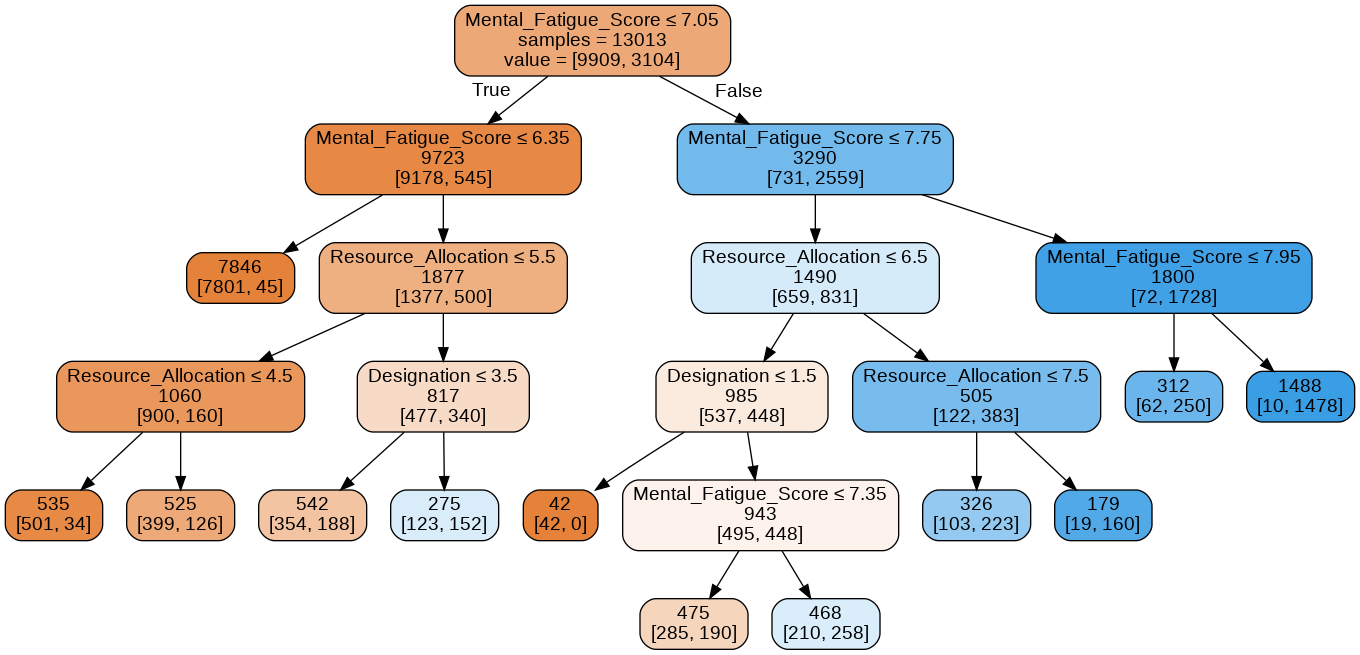

In [ ]:
plotDecisionTree(bestAccuracyTree, feature_names=train_X.columns)

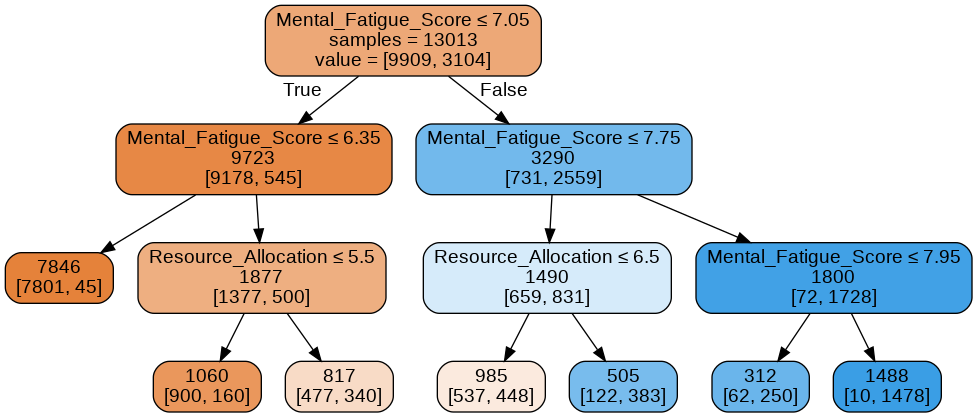

In [ ]:
plotDecisionTree(bestPrecisionTree, feature_names=train_X.columns)

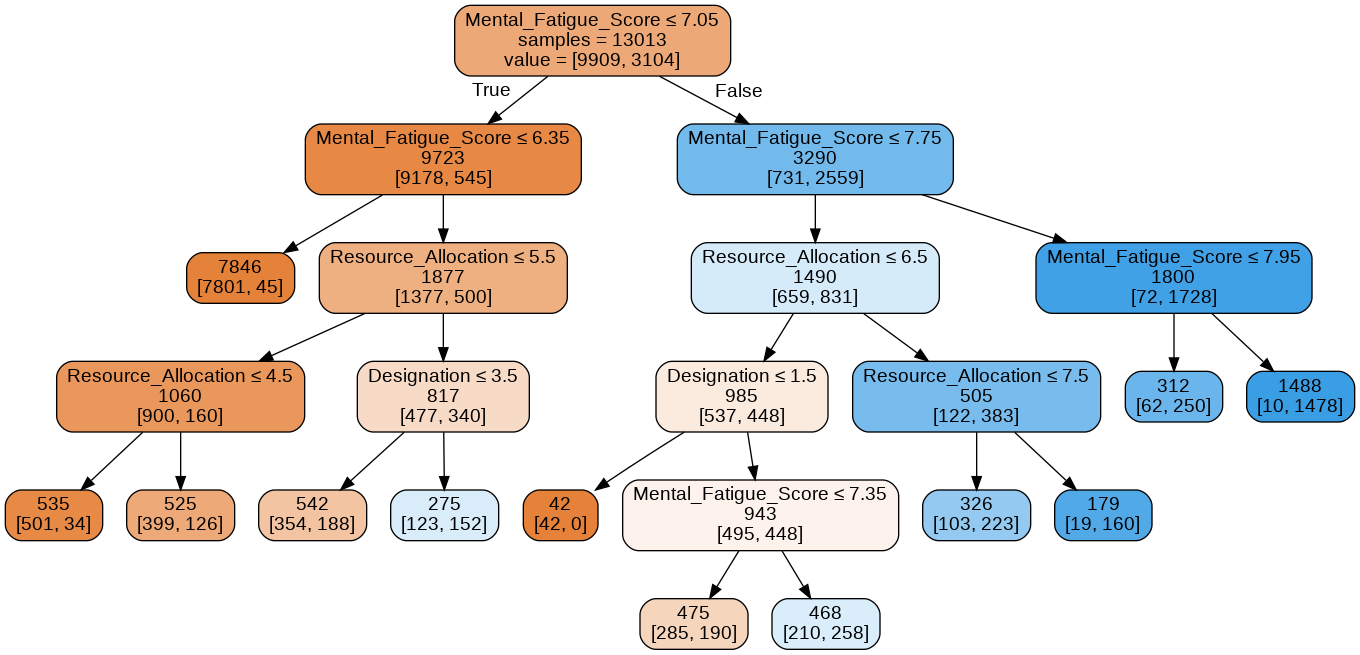

In [ ]:
plotDecisionTree(bestRecallTree, feature_names=train_X.columns)

In [ ]:
dtree_tuned = DecisionTreeClassifier()

gridSearch = GridSearchCV(estimator = dtree_tuned, param_grid=param_grid, cv = 3, verbose=2,  n_jobs = -1)

gridSearch.fit(train_X, train_y)
bestGridModel = gridSearch.best_estimator_
print('Best parameters found: ', gridSearch.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters found:  {'max_depth': 140, 'min_impurity_decrease': 0.0006, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    1.5s finished


In [ ]:
validation_predictions = bestGridModel.predict(valid_X)
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

0.9230769230769231
0.8448540706605223
0.8289374529012811


# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest=RandomForestClassifier(random_state=1)

In [ ]:
forest.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
validation_predictions = forest.predict(valid_X)

print(confusion_matrix(valid_y, validation_predictions))
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

[[4006  244]
 [ 267 1060]]
0.9083736776044469
0.8128834355828221
0.79879427279578


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
 
min_samples_leaf = [1, 2, 4]

max_features = ['auto']

max_leaf_nodes = [None]

min_impurity_decrease = [0.001, 0.005, 0.01, 0.05]

bootstrap = [True]

param_grid_random = {'n_estimators': n_estimators,
                      'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_features': max_features,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                      'bootstrap': bootstrap,
                     }

In [ ]:
rf = RandomForestClassifier()

randomSearch = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_random, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

randomSearch.fit(train_X, train_y)
bestRandomModel = randomSearch.best_estimator_
print('Best parameters found: ', randomSearch.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


Best parameters found:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
validation_predictions = bestRandomModel.predict(valid_X)
print('Accuracy Score: ', accuracy_score(valid_y, validation_predictions))
print('Precision Score: ', precision_score(valid_y, validation_predictions))
print('Recall Score: ', recall_score(valid_y, validation_predictions))

Accuracy Score:  0.9196700735162273
Precision Score:  0.8541498791297341
Recall Score:  0.79879427279578


In [ ]:
param_grid = {'n_estimators': [700,800,900],
              'min_samples_split': [4, 5, 6],  
              'min_samples_leaf': [1, 2],
              'min_impurity_decrease': [0.005, 0.001, 0.0015],
              'max_leaf_nodes': [None], 
              'max_features': ['auto'], 
              'max_depth': [75, 80, 85],
              'criterion': ['entropy'],
              'bootstrap': [True]}

In [ ]:
rf = RandomForestClassifier()

gridSearch = GridSearchCV(estimator = rf, param_grid=param_grid, cv = 2, verbose=2,  n_jobs = -1)

gridSearch.fit(train_X, train_y)
bestGridModel = gridSearch.best_estimator_
print('Best parameters found: ', gridSearch.best_params_)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 10.8min finished


Best parameters found:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 80, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 700}


In [ ]:
validation_predictions = bestGridModel.predict(valid_X)
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

0.9245113860498476
0.8731466227347611
0.79879427279578


# XGBoost

In [ ]:
xgboost=XGBClassifier(random_state=1)
xgboost.fit(train_X, train_y)
validation_predictions = xgboost.predict(valid_X)
print(confusion_matrix(valid_y, validation_predictions))
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

[[4078  172]
 [ 254 1073]]
0.9236148466917697
0.8618473895582329
0.8085908063300679


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = [int(x) for x in np.linspace(1, 200, num = 199)]
max_depth.append(None)
param_grid_random = {'n_estimators': n_estimators,'max_depth': max_depth,'learning_rate': learning_rate,}

In [ ]:
xgb = XGBClassifier()
randomSearch = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid_random, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
randomSearch.fit(train_X, train_y)
bestRandomModel = randomSearch.best_estimator_
print('Best Parameters Found: ', randomSearch.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.3min finished


Best Parameters Found:  {'n_estimators': 700, 'max_depth': 1, 'learning_rate': 0.5}


In [ ]:
validation_predictions = bestRandomModel.predict(valid_X)
print('Accuracy Score: ', accuracy_score(valid_y, validation_predictions))
print('Precision Score: ', precision_score(valid_y, validation_predictions))
print('Recall Score: ', recall_score(valid_y, validation_predictions))

Accuracy Score:  0.9232562309485386
Precision Score:  0.8627925746569814
Recall Score:  0.8055764883195177


In [ ]:
param_grid =  {'n_estimators': [180, 190, 195, 200, 205, 210, 220],'max_depth': [2, 3, 4, 5, 6],'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],}

In [ ]:
xgb = XGBClassifier()
gridSearch = GridSearchCV(estimator = xgb, param_grid=param_grid, cv = 3, verbose=2,  n_jobs = -1)
gridSearch.fit(train_X, train_y)
bestGridModel = gridSearch.best_estimator_
print('Best Parameters Found: ', gridSearch.best_params_)

Fitting 3 folds for each of 175 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:  5.8min finished


Best Parameters Found:  {'learning_rate': 0.09, 'max_depth': 2, 'n_estimators': 195}


In [ ]:
validation_predictions = bestGridModel.predict(valid_X)
print(accuracy_score(valid_y, validation_predictions))
print(precision_score(valid_y, validation_predictions))
print(recall_score(valid_y, validation_predictions))

0.9239734624350009
0.8586179507545671
0.814619442351168
